In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from sklearn import datasets
from sklearn.cross_validation import StratifiedKFold
from sklearn.externals.six.moves import xrange
from sklearn.mixture import GMM
%matplotlib inline

ImportError: No module named cross_validation

In [2]:
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

iris = datasets.load_iris()


NameError: name 'data' is not defined

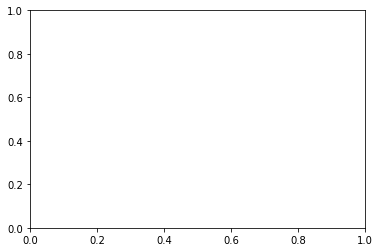

In [3]:
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], 0.8, color=color, label=iris.target_names[n])

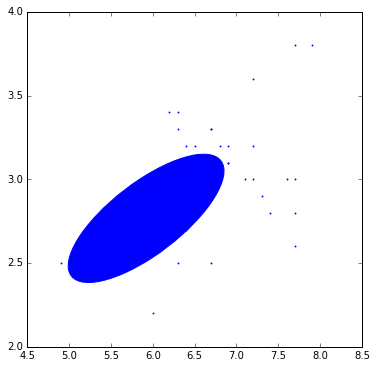

In [77]:
plt.figure(figsize=[6,6])
f1s1 = plt.subplot(111)
f1s1.scatter(data[:, 0], data[:, 1], 0.8, color=color, label=iris.target_names[n])

from matplotlib.patches import Ellipse, Rectangle, RegularPolygon
#ells = Ellipse(xy=(6,3), width=2 , height= 2 , angle=90, color='red') 

ells = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],  180 + angle, color=color)
f1s1.add_artist(ells)

In [62]:
make_ellipses(classifier, ax)


AttributeError: 'Ellipse' object has no attribute 'show'

In [4]:


# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(iris.target, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

In [5]:
n_classes = len(np.unique(y_train))

In [6]:
# Try GMMs using different types of covariances.
classifiers = dict((covar_type, GMM(n_components=n_classes,
                    covariance_type=covar_type, init_params='wc', n_iter=20))
                   for covar_type in ['spherical', 'diag', 'tied', 'full'])

n_classifiers = len(classifiers)

In [9]:
covar_type = 'full'
classifier = GMM(n_components=n_classes, covariance_type=covar_type, init_params='wc', n_iter=20)

In [11]:
classifier.fit(X_train)

GMM(covariance_type='full', init_params='wc', min_covar=0.001, n_components=3,
  n_init=1, n_iter=20, params='wmc', random_state=None, thresh=None,
  tol=0.001, verbose=0)

In [26]:
classifier._get_covars()
classifier.get_params()
classifier.means_

array([[ 6.56187106,  2.98001517,  5.47659162,  2.00830606],
       [ 5.04594595,  3.45135135,  1.46486486,  0.25675676],
       [ 5.92067723,  2.76736856,  4.24196137,  1.30954252]])

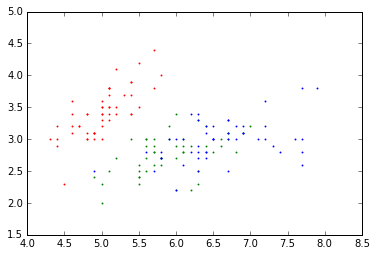

In [14]:
for n, color in enumerate('rgb'):
    data = iris.data[iris.target == n]
    plt.scatter(data[:, 0], data[:, 1], 0.8, color=color, label=iris.target_names[n])

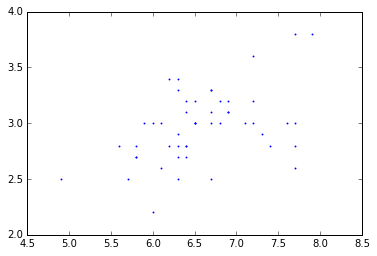

In [28]:
h= plt.scatter(data[:, 0], data[:, 1], 0.8, color=color, label=iris.target_names[n])

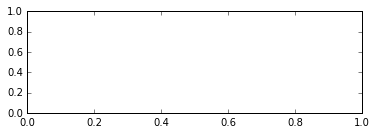

In [31]:
h = plt.subplot(2, 1, 1)
make_ellipses(classifier, h)

In [32]:
gmm=classifier
v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])

In [33]:
u = w[0] / np.linalg.norm(w[0])
angle = np.arctan2(u[1], u[0])
angle = 180 * angle / np.pi  # convert to degrees

In [34]:
v *= 9
ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color)

In [41]:
ell

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

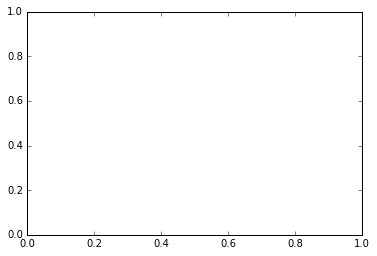

In [46]:
fig, ax = plt.subplots()
ax.add_artist(ell)